This script reads the results from using the online bioinformatics tool DAVID to identify significantly enriched Biological Processes for differentially abundant proteins. There are four groups of proteins that were submitted to DAVID:

1.  Differentially abundant proteins higher in Active GCA compared to Healthy controls
2. Differentially abundant proteins lower in Active GCA compared to Healthy controls
3. Differentially abundant proteins higher in Inactive GCA compared to Healthy controls
4. Differentially abundant protein lower in Inactive GCA compared to Healthy controls

A P-value < 0.01 from a modified Fisher's exact test provided by DAVID was used as a threshold for significance. This script orders all Biological Processes based on their P-values and plots the top 20 most significant GO Biological Processes for each group of differentially abundant proteins. The script makes four bar graphs with the length of the bars as the P-value significance and shade representing the fold-enrichment.

In [ ]:
library("dplyr")
library("ggpubr")
library("lme4")
library("lmerTest")
library("ggplot2")
library("RColorBrewer")

In [6]:
#read in the results from proteins higher in Active
higher_in_active_BP = read.csv("../../analysis/Figure_3A_B_C_D/GO_terms_for_proteins_higher_in_Active.csv")
higher_in_active_BP = higher_in_active_BP[order(higher_in_active_BP$PValue),]
#head(higher_in_active_BP)
#make a bar graph of the top 20 values
top_higher_in_Active = data.frame(higher_in_active_BP[1:20,])
top_higher_in_Active$log_pvalue = -log10(top_higher_in_Active[,3])
#top_higher_in_Active = rbind(top_higher_in_Active,gradient_color_samples)
top_higher_in_Active$Order = seq(20,1)
#head(top_higher_in_Active)

In [7]:
temp_df = filter(higher_in_active_BP,higher_in_active_BP$PValue < 0.01)
dim(temp_df)

temp_df2 = filter(higher_in_active_BP,higher_in_active_BP$PValue < 0.05)
dim(temp_df2)

[1] 193   6

[1] 353   6

pdf 
  2

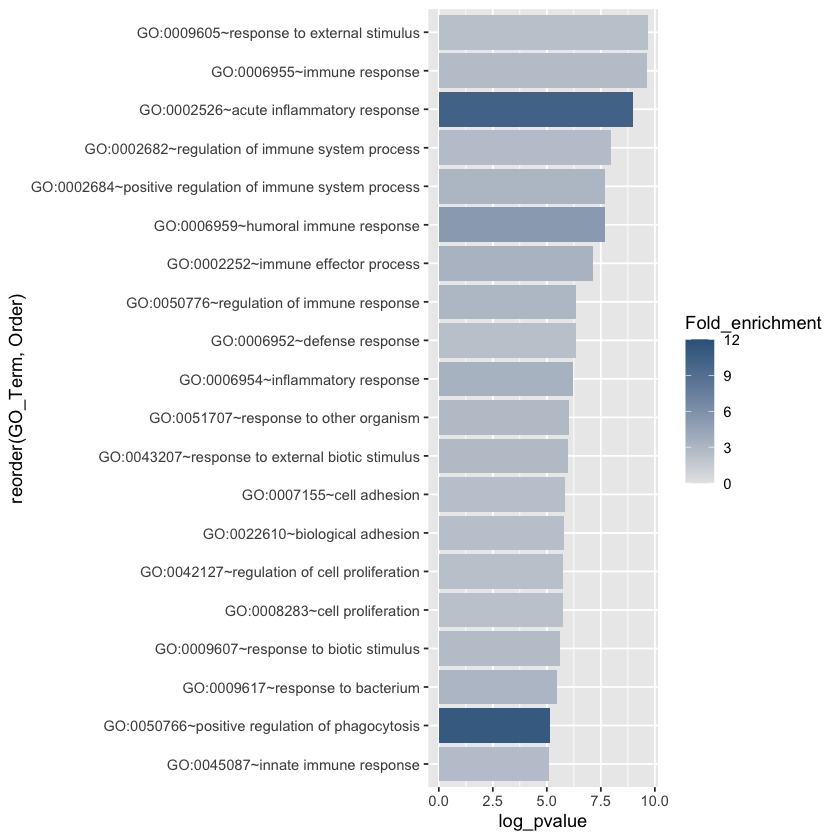

In [8]:
#plot

higher_in_active_bar_graph = ggplot(top_higher_in_Active,aes(x = log_pvalue,y = reorder(GO_Term,Order),fill = Fold_enrichment))+
                             geom_bar(stat = "identity")+ scale_fill_gradient(low = "grey90", high = "steelblue4",
                             limits = c(0, 12)) 
pdf("../../analysis/Figure_3A_B_C_D/GO_terms_higher_in_Active_GCA.pdf",width=15, height=10)
higher_in_active_bar_graph
dev.off()
print(higher_in_active_bar_graph)

In [9]:
#read in the results from proteins lower in Active
lower_in_active_BP = read.csv("../../analysis/Figure_3A_B_C_D/GO_terms_for_proteins_lower_in_Active.csv")
lower_in_active_BP = lower_in_active_BP[order(lower_in_active_BP$PValue),]
#head(lower_in_active_BP)
#make a bar graph of the top 20 values
top_lower_in_Active = data.frame(lower_in_active_BP[1:20,])
top_lower_in_Active$log_pvalue = -log10(top_lower_in_Active[,3])
top_lower_in_Active$Order = seq(20,1)
#head(top_lower_in_Active)

In [10]:
temp_df = filter(lower_in_active_BP,lower_in_active_BP$PValue < 0.01)
dim(temp_df)

temp_df2 = filter(lower_in_active_BP,lower_in_active_BP$PValue < 0.05)
dim(temp_df2)

[1] 432   6

[1] 700   6

pdf 
  2

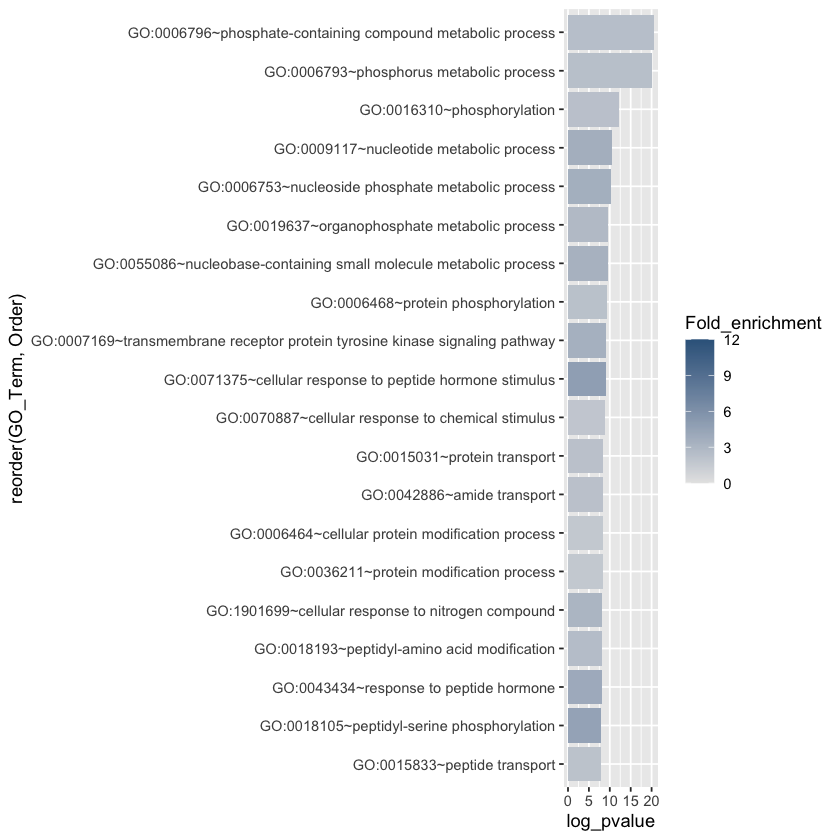

In [11]:
#plot
lower_in_active_bar_graph = ggplot(top_lower_in_Active,aes(x = log_pvalue,y = reorder(GO_Term,Order),fill = Fold_enrichment)) +
                            geom_bar(stat = "identity") + scale_fill_gradient(low = "grey90", high = "steelblue4",
                            limits = c(0, 12)) 
pdf("../../analysis/Figure_3A_B_C_D/GO_terms_lower_in_Active_GCA.pdf",width=15, height=10)
lower_in_active_bar_graph
dev.off()
lower_in_active_bar_graph

In [12]:
#read in the results from proteins higher in Inactive
higher_in_Inactive_BP = read.csv("../../analysis/Figure_3A_B_C_D/GO_terms_for_proteins_higher_in_Inactive.csv")
higher_in_Inactive_BP = higher_in_Inactive_BP[order(higher_in_Inactive_BP$PValue),]
#head(higher_in_Inactive_BP)
#make a bar graph of the top 20 values
top_higher_in_Inactive = data.frame(higher_in_Inactive_BP[1:20,])
top_higher_in_Inactive$log_pvalue = -log10(top_higher_in_Inactive[,3])
top_higher_in_Inactive$Order = seq(20,1)
#head(top_higher_in_Inactive)

In [13]:
temp_df = filter(higher_in_Inactive_BP,higher_in_Inactive_BP$PValue < 0.01)
dim(temp_df)

temp_df2 = filter(higher_in_Inactive_BP,higher_in_Inactive_BP$PValue < 0.05)
dim(temp_df2)

[1] 357   6

[1] 553   6

pdf 
  2

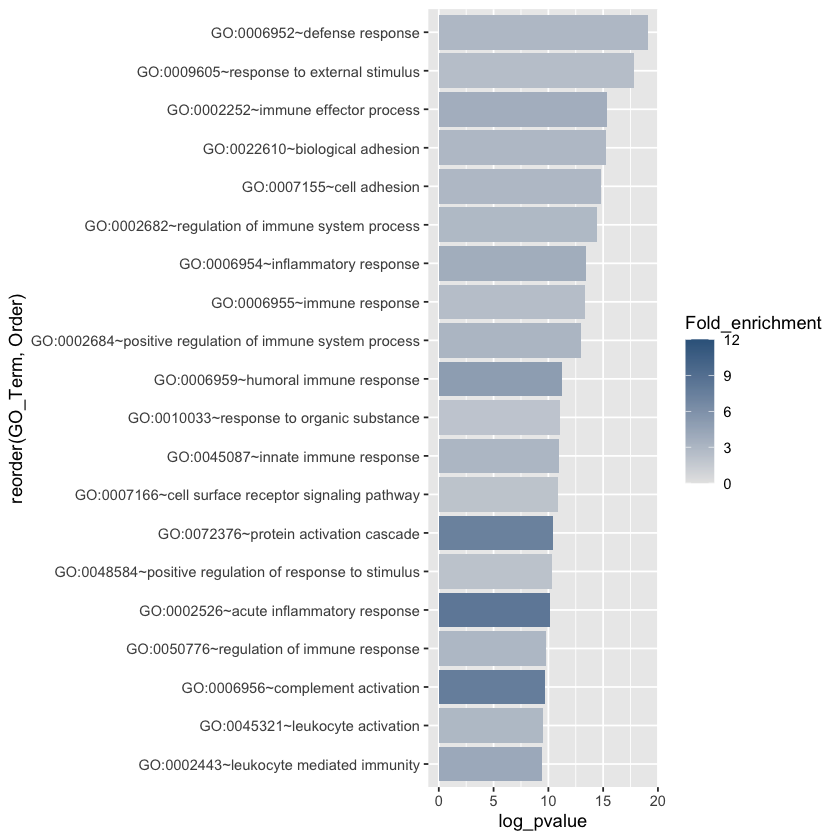

In [14]:
#plot
higher_in_inactive_bar_graph = ggplot(top_higher_in_Inactive,aes(x = log_pvalue,y=reorder(GO_Term,Order),fill = Fold_enrichment))+
                               geom_bar(stat = "identity") + scale_fill_gradient(low = "grey90", high = "steelblue4",
                               limits = c(0, 12)) 
pdf("../../analysis/Figure_3A_B_C_D/GO_terms_higher_in_Inactive_GCA.pdf",width=15, height=10)
higher_in_inactive_bar_graph
dev.off()
higher_in_inactive_bar_graph

In [16]:
#read in the results from proteins lower in Inactive
lower_in_Inactive_BP = read.csv("../../analysis/Figure_3A_B_C_D/GO_terms_for_proteins_lower_in_Inactive.csv")
lower_in_Inactive_BP = lower_in_Inactive_BP[order(lower_in_Inactive_BP$PValue),]
#head(lower_in_Inactive_BP)
#make a bar graph of the top 20 values
top_lower_in_Inactive = data.frame(lower_in_Inactive_BP[1:20,])
top_lower_in_Inactive$log_pvalue = -log10(top_lower_in_Inactive[,3])
top_lower_in_Inactive$Order = seq(20,1)
#head(top_lower_in_Inactive)

In [17]:
temp_df = filter(lower_in_Inactive_BP,lower_in_Inactive_BP$PValue < 0.01)
dim(temp_df)

temp_df2 = filter(lower_in_Inactive_BP,lower_in_Inactive_BP$PValue < 0.05)
dim(temp_df2)

[1] 578   6

[1] 967   6

pdf 
  2

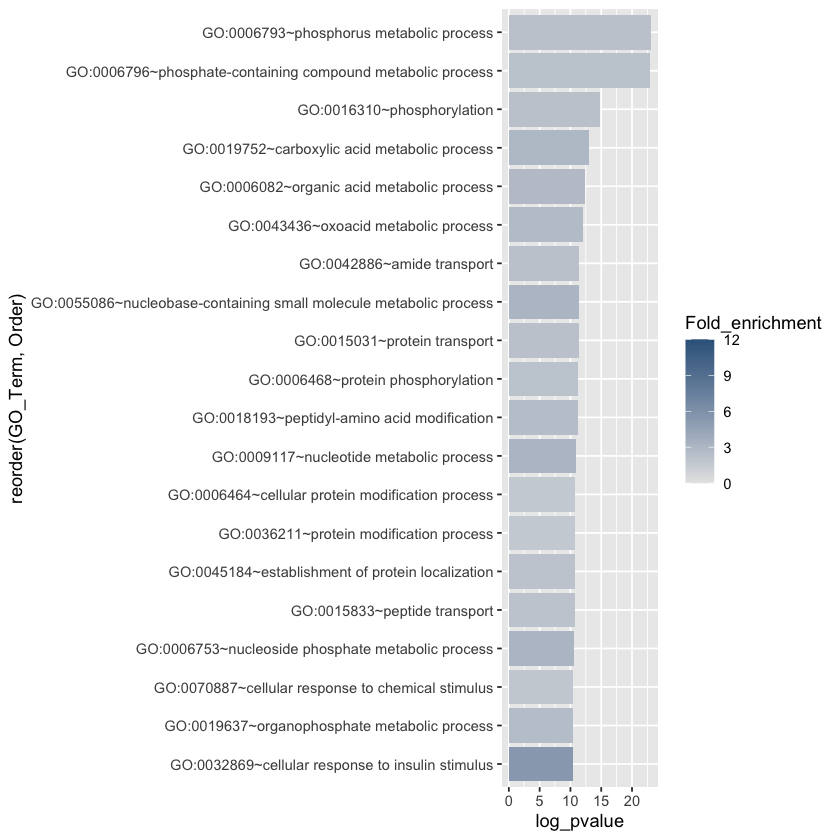

In [18]:
#plot
lower_in_inactive_bar_graph = ggplot(top_lower_in_Inactive,aes(x = log_pvalue,y=reorder(GO_Term,Order),fill = Fold_enrichment))+
                              geom_bar(stat = "identity") + scale_fill_gradient(low = "grey90", high = "steelblue4",
                              limits = c(0, 12)) 
pdf("../../analysis/Figure_3A_B_C_D/GO_terms_lower_in_Inactive_GCA.pdf",width=15, height=10)
lower_in_inactive_bar_graph
dev.off()
lower_in_inactive_bar_graph